In [1]:
cd ..

D:\Desktop\Undergrad_Thesis


In [2]:
import numpy as np
import pickle
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
from model import ANN,SVM,RF
from torch import nn
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from copy import deepcopy

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Load all data files


In [3]:
directory = 'Models/post_processed/'
X_raw_50 = np.load(file=directory+'50/X_raw.npy')
y_raw_50 = np.load(file=directory+'50/Y_raw.npy')
X_filtered_50 = np.load(file=directory+'50/X_filtered.npy')
y_filtered_50 = np.load(file=directory+'50/Y_filtered.npy')
with open(directory+'50/labels','rb') as fp:
    columns_50 = pickle.load(fp)
    

X_raw_100 = np.load(file=directory+'100/X_raw.npy')
y_raw_100 = np.load(file=directory+'100/Y_raw.npy')
X_filtered_100 = np.load(file=directory+'100/X_filtered.npy')
y_filtered_100 = np.load(file=directory+'100/Y_filtered.npy')
with open(directory+'100/labels','rb') as fp:
    columns_100 = pickle.load(fp)
   

X_raw_150 = np.load(file=directory+'150/X_raw.npy')
y_raw_150 = np.load(file=directory+'150/Y_raw.npy')
X_filtered_150 = np.load(file=directory+'150/X_filtered.npy')
y_filtered_150 = np.load(file=directory+'150/Y_filtered.npy')
with open(directory+'150/labels','rb') as fp:
    columns_150 = pickle.load(fp)
    

X_raw_200 = np.load(file=directory+'200/X_raw.npy')
y_raw_200 = np.load(file=directory+'200/Y_raw.npy')
X_filtered_200 = np.load(file=directory+'200/X_filtered.npy')
y_filtered_200 = np.load(file=directory+'200/Y_filtered.npy')
with open(directory+'200/labels','rb') as fp:
    columns_200 = pickle.load(fp)
    
X_raw_250 = np.load(file=directory+'250/X_raw.npy')
y_raw_250 = np.load(file=directory+'250/Y_raw.npy')
X_filtered_250 = np.load(file=directory+'250/X_filtered.npy')
y_filtered_250 = np.load(file=directory+'250/Y_filtered.npy')
with open(directory+'250/labels','rb') as fp:
    columns_250 = pickle.load(fp)
    
X_raw_300 = np.load(file=directory+'300/X_raw.npy')
y_raw_300 = np.load(file=directory+'300/Y_raw.npy')
X_filtered_300 = np.load(file=directory+'300/X_filtered.npy')
y_filtered_300 = np.load(file=directory+'300/Y_filtered.npy')
with open(directory+'200/labels','rb') as fp:
    columns_300 = pickle.load(fp)
    






## Analysis 1 

###  Visualize mutual information scores for each segment length

In [ ]:
mi_scores_raw_50 = mutual_info_classif(X_raw_50,y_raw_50.ravel())
mi_scores_raw_50 = pd.Series(mi_scores_raw_50, name="Raw 50", index=columns_50)
mi_scores_filtered_50 = mutual_info_classif(X_filtered_50,y_filtered_50.ravel())
mi_scores_filtered_50 = pd.Series(mi_scores_filtered_50,name="Filtered 50",index=columns_50)

mi_scores_raw_100 = mutual_info_classif(X_raw_100,y_raw_100.ravel())
mi_scores_raw_100 = pd.Series(mi_scores_raw_100, name="Raw 100", index=columns_100)
mi_scores_filtered_100 = mutual_info_classif(X_filtered_100,y_filtered_100.ravel())
mi_scores_filtered_100 = pd.Series(mi_scores_filtered_100,name="Filtered 100",index=columns_100)

mi_scores_raw_150 = mutual_info_classif(X_raw_150,y_raw_150.ravel())
mi_scores_raw_150 = pd.Series(mi_scores_raw_150, name="Raw 150", index=columns_150)
mi_scores_filtered_150 = mutual_info_classif(X_filtered_150,y_filtered_150.ravel())
mi_scores_filtered_150 = pd.Series(mi_scores_filtered_150,name="Filtered 150",index=columns_150)

mi_scores_raw_200 = mutual_info_classif(X_raw_200,y_raw_200.ravel())
mi_scores_raw_200 = pd.Series(mi_scores_raw_200, name="Raw 200", index=columns_200)
mi_scores_filtered_200 = mutual_info_classif(X_filtered_200,y_filtered_200.ravel())
mi_scores_filtered_200 = pd.Series(mi_scores_filtered_200,name="Filtered 200",index=columns_200)

mi_scores_raw_250 = mutual_info_classif(X_raw_250,y_raw_250.ravel())
mi_scores_raw_250 = pd.Series(mi_scores_raw_250, name="Raw 250", index=columns_250)
mi_scores_filtered_250 = mutual_info_classif(X_filtered_250,y_filtered_250.ravel())
mi_scores_filtered_250 = pd.Series(mi_scores_filtered_250,name="Filtered 200",index=columns_250)

mi_scores_raw_300 = mutual_info_classif(X_raw_300,y_raw_300.ravel())
mi_scores_raw_300 = pd.Series(mi_scores_raw_300, name="Raw 300", index=columns_300)
mi_scores_filtered_300 = mutual_info_classif(X_filtered_300,y_filtered_300.ravel())
mi_scores_filtered_300 = pd.Series(mi_scores_filtered_300,name="Filtered 300",index=columns_300)



In [ ]:
df_mi_scores = pd.concat([mi_scores_raw_50,
                          mi_scores_filtered_50,
                          mi_scores_raw_100,
                          mi_scores_filtered_100,
                          mi_scores_raw_150,
                          mi_scores_filtered_150,
                          mi_scores_raw_200,
                          mi_scores_filtered_200,
                          mi_scores_raw_250,
                          mi_scores_filtered_250,
                          mi_scores_raw_300,
                          mi_scores_filtered_300,],axis=1)
df_mi_scores

In [ ]:
sns.heatmap(df_mi_scores,)

## Analysis 2

### Visualize Model Performances

#### Training Artificial Neural Net (With All Features)

In [4]:
#Initializing models
ann_50_raw = ANN(X_raw_50,y_raw_50,'ANN 50 Raw')
ann_50_filtered = ANN(X_filtered_50,y_filtered_50,'ANN 50 Filtered')
ann_100_raw = ANN(X_raw_100,y_filtered_100,'ANN 100 Raw')
ann_100_filtered = ANN(X_filtered_100,y_raw_100,'ANN 100 Filtered')
ann_150_raw = ANN(X_raw_150,y_raw_150,'ANN 150 Raw')
ann_150_filtered = ANN(X_filtered_150,y_filtered_150,'ANN 150 Filtered')
ann_200_raw = ANN(X_raw_200,y_raw_200,'ANN 200 Raw')
ann_200_filtered = ANN(X_filtered_200,y_filtered_200,'ANN 200 FIltered')
ann_250_raw = ANN(X_raw_250,y_raw_250,'ANN 250 Raw')
ann_250_filtered = ANN(X_filtered_250,y_filtered_250,'ANN 250 FIltered')
ann_300_raw = ANN(X_raw_300,y_raw_300,'ANN 300 Raw')
ann_300_filtered = ANN(X_filtered_300,y_filtered_300,'ANN 300 FIltered')

svc_50_raw = SVM(X_raw_50,y_raw_50,'SVC 50 Raw')
svc_50_filtered = SVM(X_filtered_50,y_filtered_50,'SVC 50 Filtered')
svc_100_raw = SVM(X_raw_100,y_filtered_100,'SVC 100 Raw')
svc_100_filtered = SVM(X_filtered_100,y_raw_100,'SVC 100 Filtered')
svc_150_raw = SVM(X_raw_150,y_raw_150,'SVC 150 Raw')
svc_150_filtered = SVM(X_filtered_150,y_filtered_150,'SVC 150 Filtered')
svc_200_raw = SVM(X_raw_200,y_raw_200,'SVC 200 Raw')
svc_200_filtered = SVM(X_filtered_200,y_filtered_200,'SVC 200 FIltered')
svc_250_raw = SVM(X_raw_250,y_raw_250,'SVC 250 Raw')
svc_250_filtered = SVM(X_filtered_250,y_filtered_250,'SVC 250 FIltered')
svc_300_raw = SVM(X_raw_300,y_raw_300,'SVC 300 Raw')
svc_300_filtered = SVM(X_filtered_300,y_filtered_300,'SVC 300 FIltered')

rf_50_raw = RF(X_raw_50,y_raw_50,'RF 50 Raw')
rf_50_filtered = RF(X_filtered_50,y_filtered_50,'RF 50 Filtered')
rf_100_raw = RF(X_raw_100,y_filtered_100,'RF 100 Raw')
rf_100_filtered = RF(X_filtered_100,y_raw_100,'RF 100 Filtered')
rf_150_raw = RF(X_raw_150,y_raw_150,'RF 150 Raw')
rf_150_filtered = RF(X_filtered_150,y_filtered_150,'RF 150 Filtered')
rf_200_raw = RF(X_raw_200,y_raw_200,'RF 200 Raw')
rf_200_filtered = RF(X_filtered_200,y_filtered_200,'RF 200 FIltered')
rf_250_raw = RF(X_raw_250,y_raw_250,'RF 250 Raw')
rf_250_filtered = RF(X_filtered_250,y_filtered_250,'RF 250 FIltered')
rf_300_raw = RF(X_raw_300,y_raw_300,'RF 300 Raw')
rf_300_filtered = RF(X_filtered_300,y_filtered_300,'RF 300 FIltered')

In [ ]:
print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
val_50_raw_losses = ann_50_raw.train()
print('Training Filtered')
val_50_filtered_losses = ann_50_filtered.train()
test_accuracy_50_raw = ann_50_raw.test()
test_accuracy_50_filtered = ann_50_filtered.test()
'''
print(f"Now Training for window length:100 Raw & Filtered")
print('Training Raw')
val_100_raw_losses = ann_100_raw.train()
print('Training Filtered')
val_100_filtered_losses = ann_100_filtered.train()
test_accuracy_100_raw = ann_100_raw.test()
test_accuracy_100_filtered = ann_100_filtered.test()

print(f"Now Training for window length:150 Raw & Filtered")
print('Training Raw')
val_150_raw_losses = ann_150_raw.train()
print('Training Filtered')
val_150_filtered_losses = ann_150_filtered.train()
test_accuracy_150_raw = ann_150_raw.test()
test_accuracy_150_filtered = ann_150_filtered.test()

print(f"Now Training for window length:200 Raw & Filtered")
print('Training Raw')
val_200_raw_losses = ann_200_raw.train()
print('Training Filtered')
val_200_filtered_losses = ann_200_filtered.train()
test_accuracy_200_raw = ann_200_raw.test()
test_accuracy_200_filtered = ann_200_filtered.test()

print(f"Now Training for window length:250 Raw & Filtered")
print('Training Raw')
val_250_raw_losses = ann_250_raw.train()
print('Training Filtered')
val_250_filtered_losses = ann_250_filtered.train()
test_accuracy_250_raw = ann_250_raw.test()
test_accuracy_250_filtered = ann_250_filtered.test()

print(f"Now Training for window length:300 Raw & Filtered")
print('Training Raw')
val_300_raw_losses = ann_300_raw.train()
print('Training Filtered')
val_300_filtered_losses = ann_300_filtered.train()
test_accuracy_300_raw = ann_300_raw.test()
test_accuracy_300_filtered = ann_300_filtered.test()
'''

In [ ]:
print(test_accuracy_50_filtered)

In [ ]:
print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
svc_50_raw.train()
print('Training Filtered')
svc_50_filtered.train()
test_accuracy_50_raw = svc_50_raw.test()
test_accuracy_50_filtered = svc_50_filtered.test()


print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
svc_100_raw.train()
print('Training Filtered')
svc_100_filtered.train()
svc_100_raw.test()
svc_100_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
svc_150_raw.train()
print('Training Filtered')
svc_150_filtered.train()
svc_150_raw.test()
svc_150_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
svc_200_raw.train()
print('Training Filtered')
svc_200_filtered.train()
svc_200_raw.test()
svc_200_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
svc_250_raw.train()
print('Training Filtered')
svc_250_filtered.train()
svc_250_raw.test()
svc_250_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
svc_300_raw.train()
print('Training Filtered')
svc_300_filtered.train()
svc_300_raw.test()
svc_300_filtered.test()





In [5]:
print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
rf_50_raw.train()
print('Training Filtered')
rf_50_filtered.train()
test_accuracy_50_raw = rf_50_raw.test()
test_accuracy_50_filtered = rf_50_filtered.test()


print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
rf_100_raw.train()
print('Training Filtered')
rf_100_filtered.train()
rf_100_raw.test()
rf_100_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
rf_150_raw.train()
print('Training Filtered')
rf_150_filtered.train()
rf_150_raw.test()
rf_150_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
rf_200_raw.train()
print('Training Filtered')
rf_200_filtered.train()
rf_200_raw.test()
rf_200_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
rf_250_raw.train()
print('Training Filtered')
rf_250_filtered.train()
rf_250_raw.test()
rf_250_filtered.test()

print(f"Now Training for window length:50 Raw & Filtered")
print('Training Raw')
rf_300_raw.train()
print('Training Filtered')
rf_300_filtered.train()
rf_300_raw.test()
rf_300_filtered.test()

Now Training for window length:50 Raw & Filtered
Training Raw
Training Filtered
RF 50 Raw  Test Accuracy:0.7025590418731917
RF 50 Filtered  Test Accuracy:0.6764303496534865
Now Training for window length:50 Raw & Filtered
Training Raw
Training Filtered
RF 100 Raw  Test Accuracy:0.7163924107544286
RF 100 Filtered  Test Accuracy:0.6990828162934988
Now Training for window length:50 Raw & Filtered
Training Raw
Training Filtered
RF 150 Raw  Test Accuracy:0.7308316430020284
RF 150 Filtered  Test Accuracy:0.7129817444219066
Now Training for window length:50 Raw & Filtered
Training Raw
Training Filtered
RF 200 Raw  Test Accuracy:0.745117540687161
RF 200 FIltered  Test Accuracy:0.7100361663652803
Now Training for window length:50 Raw & Filtered
Training Raw
Training Filtered
RF 250 Raw  Test Accuracy:0.7318068465200634
RF 250 FIltered  Test Accuracy:0.7092496032645659
Now Training for window length:50 Raw & Filtered
Training Raw
Training Filtered
RF 300 Raw  Test Accuracy:0.7301349325337332
RF 

0.7103720866839308

#### Ploting losses

In [ ]:
#ploting validation losses during the training phase
labels = list(val_50_raw_losses.keys())
plt.xticks(rotation=90)
plt.plot(labels,list(val_50_raw_losses.values()),label = '50_raw')
plt.plot(labels,list(val_50_filtered_losses.values()),label = '50 filtered')

plt.plot(labels,list(val_100_raw_losses.values()),label = '100_raw')
plt.plot(labels,list(val_100_filtered_losses.values()),label = '100 filtered')

plt.plot(labels,list(val_150_raw_losses.values()),label = '150_raw')
plt.plot(labels,list(val_150_filtered_losses.values()),label = '150 filtered')

plt.plot(labels,list(val_200_raw_losses.values()),label = '200_raw')
plt.plot(labels,list(val_200_filtered_losses.values()),label = '200 filtered')

plt.plot(labels,list(val_250_raw_losses.values()),label = '250_raw')
plt.plot(labels,list(val_250_filtered_losses.values()),label = '250 filtered')

plt.plot(labels,list(val_300_raw_losses.values()),label = '300_raw')
plt.plot(labels,list(val_300_filtered_losses.values()),label = '300 filtered')

plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)
plt.title('Validation Loss during Training')




In [ ]:
#plotting training accuracy
labels = ['50_raw','50_filtered','100_raw','100_filtered','150_raw','150_filtered','200_raw','200_filtered','250_raw','250_filtered','300_raw','300_filtered']
plt.xticks(rotation=90)
y = [test_accuracy_50_raw,
     test_accuracy_50_filtered,
     test_accuracy_100_raw,
     test_accuracy_100_filtered,
     test_accuracy_150_raw,
     test_accuracy_150_filtered,
     test_accuracy_200_raw,
     test_accuracy_200_filtered,
     test_accuracy_250_raw,
     test_accuracy_250_filtered,
     test_accuracy_300_raw,
     test_accuracy_300_filtered]
plt.barh(labels,y)
plt.title('Test Accuracy')

<function unique at 0x000001B5BE2F8708>
Confusion Matrix for  RF 50 Raw
<function unique at 0x000001B5BE2F8708>
Confusion Matrix for  RF 100 Filtered
<function unique at 0x000001B5BE2F8708>
Confusion Matrix for  RF 150 Filtered
<function unique at 0x000001B5BE2F8708>
Confusion Matrix for  RF 200 FIltered
<function unique at 0x000001B5BE2F8708>
Confusion Matrix for  RF 250 FIltered
<function unique at 0x000001B5BE2F8708>
Confusion Matrix for  RF 300 FIltered


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '9'),
  Text(7, 0, '10'),
  Text(8, 0, '12'),
  Text(9, 0, '14'),
  Text(10, 0, '15'),
  Text(11, 0, '17'),
  Text(12, 0, '18'),
  Text(13, 0, '20'),
  Text(14, 0, '23'),
  Text(15, 0, '24'),
  Text(16, 0, '25'),
  Text(17, 0, '26'),
  Text(18, 0, '43')])

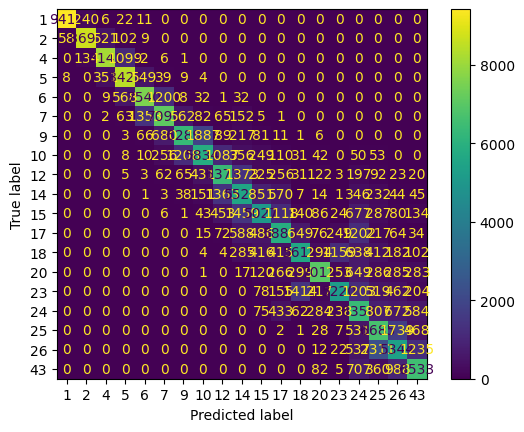

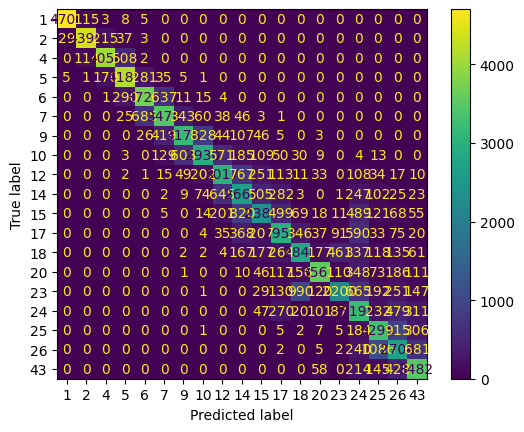

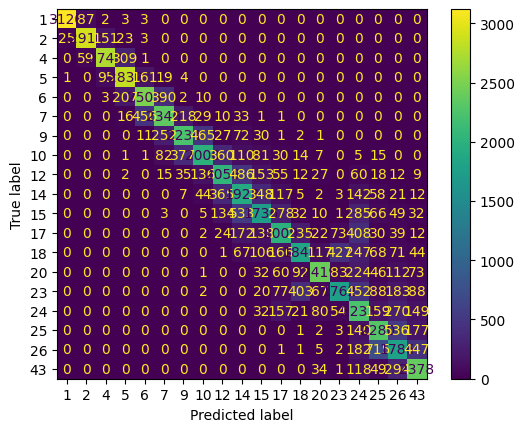

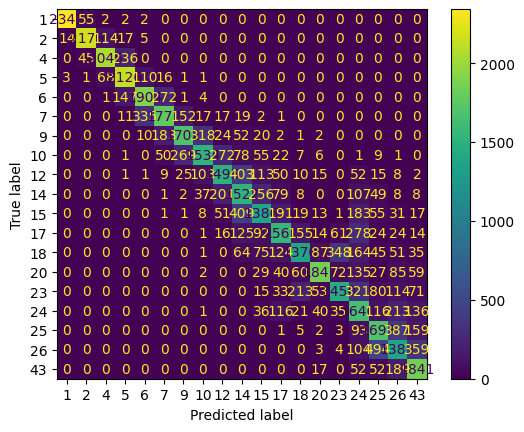

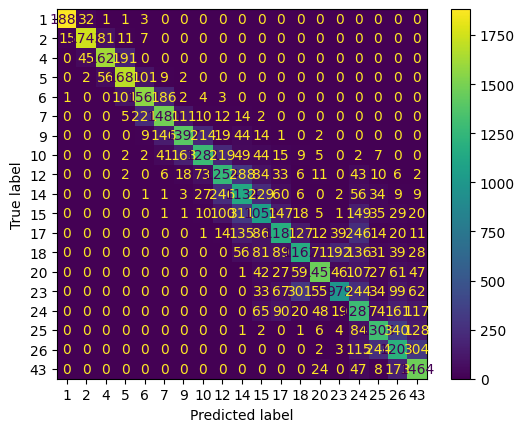

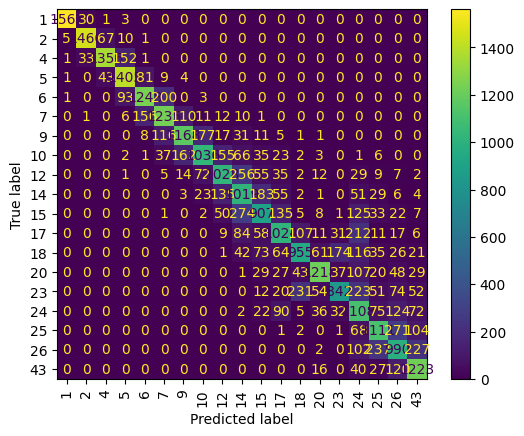

In [18]:
#plot confusion matrix
def get_confusion_matrix_ann(X,y_true,model):
    X = torch.from_numpy(X).float()
    output = model.model(X)
    argmax = torch.argmax(output,dim=1)
    predictions = deepcopy(argmax)
    print(model.categories)
    for i in range(len(argmax)):
        index = argmax[i]
        predictions[i] = model.categories[index]
    cm = confusion_matrix(y_true,predictions,labels=model.categories)
    display = ConfusionMatrixDisplay(cm,display_labels=[int(i) for i in model.categories])
    print('Confusion Matrix for ',model.name)
    display.plot()
    
def get_confusion_matrix(X,y_true,model):
    predictions = model.model.predict(X)
    print(np.unique)
    cm = confusion_matrix(y_true,predictions,labels=model.categories)
    display = ConfusionMatrixDisplay(cm,display_labels=[int(i) for i in model.categories])
    print('Confusion Matrix for ',model.name)
    display.plot()

get_confusion_matrix(X_raw_50,y_raw_50,rf_50_raw)
get_confusion_matrix(X_filtered_100,y_filtered_100,rf_100_filtered)
get_confusion_matrix(X_filtered_150,y_filtered_150,rf_150_filtered)
get_confusion_matrix(X_filtered_200,y_filtered_200,rf_200_filtered)
get_confusion_matrix(X_filtered_250,y_filtered_250,rf_250_filtered)
get_confusion_matrix(X_filtered_300,y_filtered_300,rf_300_filtered)
plt.xticks(rotation=90) 


In [ ]:
#plot classification report
def get_classification_report(X,y_true,model,):
    X = torch.from_numpy(X).float()
    output = model.model(X)
    argmax = torch.argmax(output,dim=1)
    predictions = deepcopy(argmax)
    print(model.categories)
    for i in range(len(argmax)):
        index = argmax[i]
        predictions[i] = model.categories[index]
    cr = classification_report(y_true,predictions,target_names=[str(int(i)) for i in model.categories])
    print('Classification Report for ',model.name)
    print(cr)
get_classification_report(X_raw_50,y_raw_50,ann_50_raw)
get_classification_report(X_filtered_50,y_filtered_50,ann_50_filtered)
get_classification_report(X_raw_100,y_raw_100,ann_100_raw)
get_classification_report(X_filtered_100,y_filtered_100,ann_100_filtered)
get_classification_report(X_raw_150,y_raw_150,ann_150_raw)
get_classification_report(X_filtered_150,y_filtered_150,ann_150_filtered)
get_classification_report(X_raw_200,y_raw_200,ann_200_raw)
get_classification_report(X_filtered_50,y_filtered_50,ann_50_filtered)
    

In [ ]:
torch.cuda.is_available()

In [ ]:
np.unique(svc_100_filtered.X_test)

In [10]:
rf_100_raw.X_test.shape


(22242, 60)

In [17]:
matches = 0 
for i,y in enumerate(rf_100_raw.y_test):
    
    print(rf_100_raw.X_test[i].shape)
    prediction = rf_100_raw.model.predict(np.reshape(rf_100_raw.X_test[i],(1,-1)))
    print(f'Actual: {y} Prediction: {prediction}')
    if prediction == y:
        matches+=1
        
matches/rf_100_raw.y_test.shape[0]

(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [10.] Prediction: [12.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [10.] Prediction: [14.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [10.] Prediction: [9.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [14.] Prediction: [15.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [18.] Prediction: [24.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [5.] Prediction: [6.]
(60,)
Actual: [23.] Prediction: [25.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [43.] Prediction: [

Actual: [14.] Prediction: [14.]
(60,)
Actual: [7.] Prediction: [6.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [7.] Prediction: [9.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [26.] Prediction: [25.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [14.] Prediction: [15.]
(60,)
Actual: [18.] Prediction: [14.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Ac

Actual: [7.] Prediction: [7.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [6.] Prediction: [5.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [7.] Prediction: [9.]
(60,)
Actual: [17.] Prediction: [14.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [6.] Prediction: [7.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [15.] Prediction: [24.]
(60,)
Actual: [23.] Prediction: [26.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [24.] Prediction: [43.]
(60,)
Actual: [12.] Prediction: [17.]
(60,)
Actual: [18.] Prediction: [23.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [20.] Prediction: [18.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [18.] Prediction: [18.]
(6

Actual: [25.] Prediction: [26.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [23.] Prediction: [25.]
(60,)
Actual: [10.] Prediction: [9.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [15.] Prediction: [24.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [6.] Prediction: [7.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [1.] Prediction: [1.]

Actual: [6.] Prediction: [6.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [9.] Prediction: [7.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [17.] Prediction: [24.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [15.] Prediction: [17.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [18.] Prediction: [23.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Ac

Actual: [2.] Prediction: [2.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [23.] Prediction: [18.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [10.] Prediction: [9.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [23.] Prediction: [24.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [7.] Prediction: [12.]
(6

Actual: [2.] Prediction: [2.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [17.] Prediction: [24.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [5.] Prediction: [6.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [23.] Prediction: [26.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [2.] Prediction: [4.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [12.] Prediction: [15.]
(60,)
Actual: [14.] Prediction: [25.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [23.] Prediction: [23.]
(60,

Actual: [9.] Prediction: [9.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [17.] Prediction: [26.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [20.] Prediction: [24.]


Actual: [1.] Prediction: [1.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [23.] Prediction: [25.]
(60,)
Actual: [43.] Prediction: [24.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [15.] Prediction: [14.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [24.] Prediction: [26.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [24.] Prediction: [26.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [10.] Prediction: [12.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Ac

Actual: [15.] Prediction: [15.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [18.] Prediction: [25.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [26.] Prediction: [25.]
(60,)
Actual: [15.] Prediction: [12.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [23.] Prediction: [24.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [15.] Prediction: [24.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [43.] Prediction: [24.]
(60,)
Actual: [1.] Prediction: [1.

Actual: [7.] Prediction: [7.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [23.] Prediction: [18.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [25.] Prediction: [43.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [10.] Prediction: [7.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [18.] Prediction: [14.]
(60,)
Actual: [43.] Prediction: [26.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [25.] Prediction: [24.]
(60,)
Actual: [18.] Prediction: [26.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [15.] Prediction: [17.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [43.] Prediction: [26

Actual: [23.] Prediction: [23.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [10.] Prediction: [20.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [23.] Prediction: [25.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [20.] Prediction: [23.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [15.] Prediction: [24.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [18.] Prediction: [24.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [15.] Prediction: [17.]
(60,)
Actual: [4.] Prediction: [4.]
(6

Actual: [17.] Prediction: [17.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [9.] Prediction: [5.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [24.] Prediction: [20.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [18.] Prediction: [23.]
(60,)
Actual: [17.] Prediction: [24.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [25.] Prediction: [24.]
(60,)
Actual: [14.] Prediction: [17.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [1.] Prediction:

Actual: [23.] Prediction: [24.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [6.] Prediction: [7.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [12.] Prediction: [24.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [12.] Prediction: [10.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [20.] Prediction: [24.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [6.] Prediction: [6.]


Actual: [18.] Prediction: [18.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [9.] Prediction: [7.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [24.] Prediction: [20.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [15.] Prediction: [14.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [23.] Prediction: [25.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [9.] Prediction: [10.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [26.] Prediction: [25.]

Actual: [14.] Prediction: [14.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [7.] Prediction: [6.]
(60,)
Actual: [17.] Prediction: [15.]
(60,)
Actual: [20.] Prediction: [23.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [17.] Prediction: [18.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [17.] Prediction: [14.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [18.] Prediction: [24.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [20.] Prediction: [17.]
(60,)
Actual: [17.] Prediction: [14.

Actual: [6.] Prediction: [6.]
(60,)
Actual: [10.] Prediction: [12.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [20.] Prediction: [25.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [20.] Prediction: [24.]
(60,)
Actual: [43.] Prediction: [26.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [23.] Prediction: [18.]


Actual: [2.] Prediction: [2.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [20.] Prediction: [17.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [6.] Prediction: [7.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [26.] Prediction: [25.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [9.] Prediction: [7.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [17.] Prediction: [15.]
(60,)
Actual: [18.] Prediction: [17.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [15.] Prediction: [17.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [12.] Prediction: [10.]
(60,)
Actual: [14.] Prediction: [14.]
(60,

Actual: [43.] Prediction: [26.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [12.] Prediction: [17.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [23.] Prediction: [17.]
(60,)
Actual: [20.] Prediction: [20.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [7.] Prediction: [14.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [25.] Prediction: [43.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [23.] Prediction: [18.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [20.] Prediction: [26.]
(60

Actual: [9.] Prediction: [10.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [18.] Prediction: [23.]
(60,)
Actual: [7.] Prediction: [9.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [7.] Prediction: [6.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [26.] Prediction: [25.]
(60,)
Actual: [15.] Prediction: [14.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [18.] Prediction: [17.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [23.] Prediction: [26.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [10.] Prediction: [

Actual: [4.] Prediction: [4.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [12.] Prediction: [12.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [14.] Prediction: [12.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [14.] Prediction: [17.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [14.] Prediction: [17.]
(60,)
Actual: [18.] Prediction: [18.]
(60,)
Actual

Actual: [6.] Prediction: [6.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [9.] Prediction: [7.]
(60,)
Actual: [24.] Prediction: [26.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [12.] Prediction: [20.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [10.] Prediction: [14.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [26.] Prediction: [43.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [10.] Prediction: [9.]
(60,)
Actual: [4.] Prediction: [5.]
(60,)
Actual: [25.] Prediction: [25.]
(60,)
Actual: [14.] Prediction: [14.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [6.] Prediction: [6.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [4.] Prediction: [2.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [10.] Prediction: [10.]
(60

Actual: [6.] Prediction: [6.]
(60,)
Actual: [7.] Prediction: [10.]
(60,)
Actual: [12.] Prediction: [14.]
(60,)
Actual: [23.] Prediction: [15.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [2.] Prediction: [2.]
(60,)
Actual: [17.] Prediction: [17.]
(60,)
Actual: [25.] Prediction: [26.]
(60,)
Actual: [15.] Prediction: [15.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [10.] Prediction: [10.]
(60,)
Actual: [24.] Prediction: [24.]
(60,)
Actual: [18.] Prediction: [17.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [5.] Prediction: [5.]
(60,)
Actual: [43.] Prediction: [43.]
(60,)
Actual: [23.] Prediction: [23.]
(60,)
Actual: [26.] Prediction: [26.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
Actual: [9.] Prediction: [9.]
(60,)
Actual: [12.] Prediction: [24.]
(60,)
Actual: [7.] Prediction: [7.]
(60,)
Actual: [4.] Prediction: [4.]
(60,)
Actual: [1.] Prediction: [1.]
(60,)
A

0.7163924107544286